In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
ls An*

AnscombesQuartet.csv


In [5]:
data=pd.read_csv("AnscombesQuartet.csv")
data

,x1,y1,x2,y2,x3,y3,x4,y4
0,10,8.04,10,9.14,10,7.46,8,6.58
1,8,6.95,8,8.14,8,6.77,8,5.76
2,13,7.58,13,8.74,13,12.74,8,7.71
3,9,8.81,9,8.77,9,7.11,8,8.84
4,11,8.33,11,9.26,11,7.81,8,8.47
5,14,9.96,14,8.10,14,8.84,8,7.04
6,6,7.24,6,6.13,6,6.08,8,5.25
7,4,4.26,4,3.10,4,5.39,19,12.50
8,12,10.84,12,9.13,12,8.15,8,5.56
9,7,4.82,7,7.26,7,6.42,8,7.91


In [7]:
data.columns

Index(['x1', 'y1', 'x2', 'y2', 'x3', 'y3', 'x4', 'y4'], dtype='object')

In [9]:
x1=np.array(data["x1"])
x2=np.array(data["x2"])
x3=np.array(data["x3"])
x4=np.array(data["x4"])

In [10]:
y1=np.array(data["y1"])
y2=np.array(data["y2"])
y3=np.array(data["y3"])
y4=np.array(data["y4"])

In [11]:
from scipy.stats import linregress as LR

In [14]:
m1,b1,r1,p1,s1=LR(x1,y1)
m2,b2,r2,p2,s2=LR(x2,y2)
m3,b3,r3,p3,s3=LR(x3,y3)
m4,b4,r4,p4,s4=LR(x2,y3)

In [15]:
m1,m2,m3,m4

(0.5000909090909091,
 0.5000000000000001,
 0.4997272727272729,
 0.4997272727272729)

In [16]:
b1,b2,b3,b4

(3.0000909090909103, 3.000909090909089, 3.002454545454544, 3.002454545454544)

In [17]:
r1,r2,r3,r4

(0.8164205163448399, 0.816236506000243, 0.8162867394895984, 0.8162867394895984)

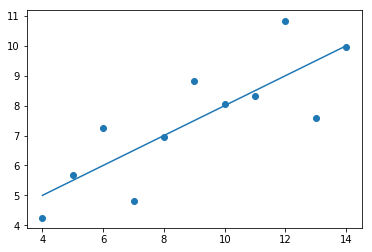

In [19]:
plt.scatter(x1,y1)
plt.plot([4,14],[m1*4+b1, m1*14+b1])

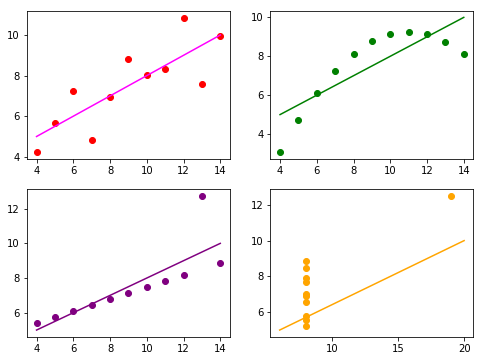

In [36]:
fig,ax=plt.subplots(nrows=2,ncols=2)
ax[0][0].scatter(x1,y1,c='red')
ax[0][0].plot([4,14],[m1*4+b1, m1*14+b1],c="magenta")

ax[0][1].scatter(x2,y2,c="green")
ax[0][1].plot([4,14],[m2*4+b2, m2*14+b2],c="green")

ax[1][0].scatter(x3,y3,c="purple")
ax[1][0].plot([4,14],[m3*4+b3, m3*14+b3],c="purple")

ax[1][1].scatter(x4,y4,c="orange")
ax[1][1].plot([6,20],[m4*4+b4, m4*14+b4],c="orange")


fig.set_size_inches(8,6)

In [21]:
ax

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe30daec898>,
      dtype=object)

In [37]:
ls *.csv

another-nonlinear-dataset.csv  BULLMARKET.csv                stock-market.csv
AnscombesQuartet.csv           first-csv-file.csv
bull-market.csv                small-nonlinear-data-set.csv


In [40]:
data=pd.read_csv("another-nonlinear-dataset.csv")
data[:3]

,X,Y
0,0.000000,-0.427077
1,0.042028,6.203124
2,0.084056,0.912327


In [41]:
X=np.array(data["X"])
Y=np.array(data["Y"])

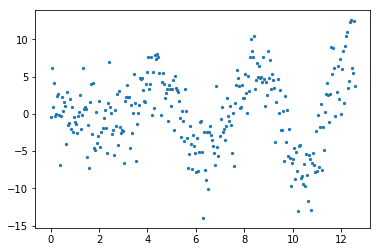

In [43]:
plt.scatter(X,Y,s=5)

In [44]:
from scipy.interpolate import LSQUnivariateSpline as LS

In [49]:
fit1=LS(X,Y,[2,6,8])
pred1=fit1(X)

fit2=LS(X,Y,np.arange(1,12,1))
pred2=fit2(X)

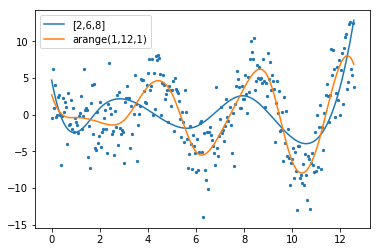

In [50]:
plt.plot(X,pred1,label="[2,6,8]")
plt.plot(X,pred2,label="arange(1,12,1)")
plt.scatter(X,Y,s=5)
plt.legend()

In [51]:
ls *.csv

another-nonlinear-dataset.csv  BULLMARKET.csv                stock-market.csv
AnscombesQuartet.csv           first-csv-file.csv
bull-market.csv                small-nonlinear-data-set.csv


In [53]:
data=pd.read_csv("small-nonlinear-data-set.csv")
data[:3]

,x,y
0,0.208333,0.205770
1,0.416667,0.029097
2,0.625000,0.136872


In [54]:
x=data["x"]
y=data["y"]

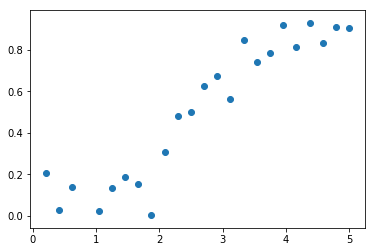

In [55]:
plt.scatter(x,y)

In [56]:
def fhill(x,a,n):
    return(x**n/(a**n+x**n))

In [58]:
from scipy.optimize import curve_fit

In [68]:
parameters, covariance=curve_fit(fhill, x, y, p0=(1, 1))

In [61]:
print(parameters)

[2.54339218 3.86571248]


In [62]:
print(covariance)

[[0.00762362 0.00992891]
 [0.00992891 0.22447413]]


In [64]:
xplot=np.linspace(0.1,5,100)
yplot=fhill(xplot,parameters[0],parameters[1])

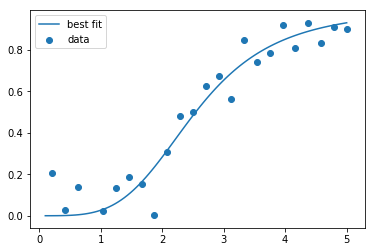

In [66]:
plt.plot(xplot,yplot,label="best fit")
plt.scatter(x,y,label="data")
plt.legend()